## viewing cifar10's ground truth

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

import matplotlib.pyplot as plt

import numpy as np

c:\Users\jrimm\.conda\envs\YOLOv3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
NUM_TRAIN = 49000

# The torchvision.transforms package provides tools for preprocessing data
# and for performing data augmentation; here we set up a transform to
# preprocess the data by subtracting the mean RGB value and dividing by the
# standard deviation of each RGB value; we've hardcoded the mean and std.
transform = T.Compose([
                T.ToTensor(),
                T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

# We set up a Dataset object for each split (train / val / test); Datasets load
# training examples one at a time, so we wrap each Dataset in a DataLoader which
# iterates through the Dataset and forms minibatches. We divide the CIFAR-10
# training set into train and val sets by passing a Sampler object to the
# DataLoader telling how it should sample from the underlying Dataset.
cifar10_train = dset.CIFAR10('./assets/datasets', train=True, download=True,
                             transform=transform)
loader_train = DataLoader(cifar10_train, batch_size=64, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = dset.CIFAR10('./assets/datasets', train=True, download=True,
                           transform=transform)
loader_val = DataLoader(cifar10_val, batch_size=64, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))

cifar10_test = dset.CIFAR10('./assets/datasets', train=False, download=True, 
                            transform=transform)
loader_test = DataLoader(cifar10_test, batch_size=64)

100%|██████████| 170498071/170498071 [00:09<00:00, 17626143.58it/s]


Extracting ./assets/datasets\cifar-10-python.tar.gz to ./assets/datasets
Files already downloaded and verified
Files already downloaded and verified


In [3]:
# visualize the shape
for X, y in loader_test:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape)
    print("Data type of y: ", y.dtype)
    print(y)    # need to transfer [64] to [64, 10] by one-hot coding
    break

Shape of X [N, C, H, W]:  torch.Size([64, 3, 32, 32])
Shape of y:  torch.Size([64])
Data type of y:  torch.int64
tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3])


## testing cross-entropy function

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

import matplotlib.pyplot as plt

import numpy as np

In [5]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)
loss = F.cross_entropy(torch.sigmoid(input), target)
print(torch.sigmoid(input))
print(target)
print(loss)

tensor([[0.5744, 0.6719, 0.7131, 0.5063, 0.3105],
        [0.2504, 0.4948, 0.4430, 0.2317, 0.7794],
        [0.7753, 0.4198, 0.1072, 0.8749, 0.4146]], grad_fn=<SigmoidBackward0>)
tensor([3, 2, 1])
tensor(1.6802, grad_fn=<NllLossBackward0>)


In [6]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
print("input = ", input)
print("target = ", target)
print("output = ", output)

# # Example of target with class probabilities
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
# output = loss(input, target)


input =  tensor([[ 1.2320, -0.2952, -0.6691, -0.0453,  0.3194],
        [-1.4660, -1.5753, -0.7805,  0.1091,  1.6613],
        [ 1.0152, -1.1274,  2.4694,  1.5994,  0.8626]], requires_grad=True)
target =  tensor([1, 2, 1])
output =  tensor(3.0790, grad_fn=<NllLossBackward0>)


## viewing mnist data structure

In [193]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

c:\Users\shuang07\.conda\envs\auto_labeling\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [194]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [195]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


## testing single data modification for moving simulation

In [7]:
# necessary packages
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import torch.nn.functional as F
import matplotlib.pyplot as plt

# additional packages
import random

ground truth =  Sneaker
Dataset size =  60000


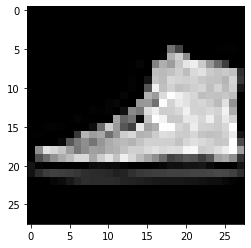

In [39]:
# get training dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# get testing dataset
testing_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# class names
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# print random item to visualize
rand = random.randint(0, 59999)
img = training_data.data[rand]
plt.imshow(img, cmap='gray')
print("ground truth = ", training_data.classes[training_data.targets[rand]])

# print dataset size 
size = len(training_data)
print("Dataset size = ", size)

### expand and clean

True
torch.Size([84, 112])


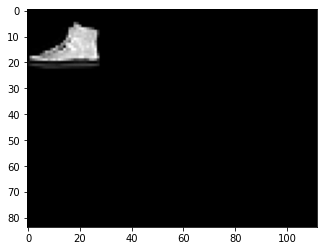

In [40]:
from torch import is_tensor

# normalization
aug_sample = training_data.data[rand]/255.

# expand and clean
aug_sample = aug_sample.repeat(3, 4)
aug_sample[:, 28:] = 0
aug_sample[28:, :] = 0

# print info
print(is_tensor(aug_sample))
print(aug_sample.size())
plt.imshow(aug_sample, cmap='gray')

### random start position

new start position [x, y] = [ 18 , 82 ]


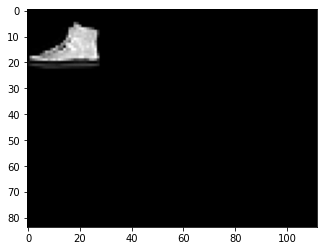

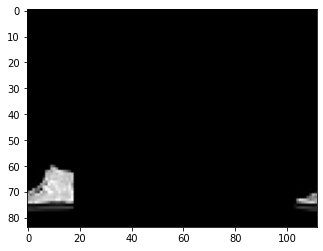

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from random import randint
from copy import deepcopy

rand_x = randint(14, 27)
rand_y = randint(27, 28*3-1)
print("new start position [x, y] = [", rand_x,",", rand_y, "]")

rand_start = deepcopy(aug_sample)
plt.imshow(rand_start, cmap='gray')
pause(0.1)

# initial movement
for i in range(28):
    for j in range(28):
        rand_start[rand_y-i][rand_x-j] = rand_start[27-i][27-j]

# clean other part
rand_start[:rand_y-28+1, :] = 0
rand_start[:, rand_x:rand_x+28] = 0

plt.imshow(rand_start, cmap='gray')


### single bounding box testing 

In [42]:
def box(col, row, box_x, box_y):    # position + length / width (visualization usage)
    view = torch.zeros([28*3, 28*4], dtype=torch.float32)
    # set the box, outside the target with one pixel
    view[row-box_y:row+1, col-box_x] = 1
    view[row-box_y:row+1, col] = 1
    view[row-box_y, col-box_x:col+1] = 1
    view[row, col-box_x:col+1] = 1
    return view

new start position [x, y] = [ 22 , 41 ]


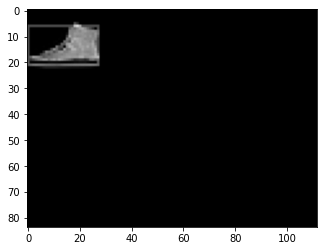

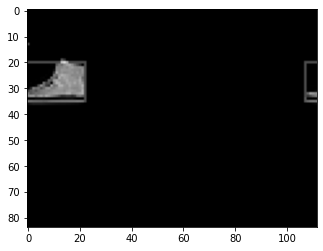

In [43]:
import torch
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from random import randint
from copy import deepcopy

rand_x = randint(14, 27)
rand_y = randint(27, 28*3-1)
print("new start position [x, y] = [", rand_x,",", rand_y, "]")

rand_start = deepcopy(aug_sample)
box_origin = box(27, 21, 27, 15)    # array for visualization, the only manual input part
box_sample = deepcopy(box_origin)

plt.imshow(rand_start, cmap='gray')
plt.imshow(box_origin, cmap='gray', alpha=0.3)
pause(0.1)

# initial movement
for i in range(28):
    for j in range(28):
        rand_start[rand_y-i][rand_x-j] = rand_start[27-i][27-j]

for i in range(29):
    for j in range(29):
        box_origin[rand_y-i+1][rand_x-j+1] = box_origin[28-i][28-j]

# clean other part
rand_start[:rand_y-28+1, :] = 0
rand_start[:, rand_x:rand_x+28] = 0
box_origin[:rand_y-28, :] = 0       # 1-pixel cleaning region difference
box_origin[:, rand_x+1:rand_x+28+1] = 0

plt.imshow(rand_start, cmap='gray')
plt.imshow(box_origin, cmap='gray', alpha=0.3)
pause(0.1)


### move sequencially

torch.Size([84, 112])


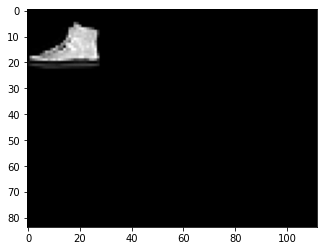

torch.Size([2, 84, 112])


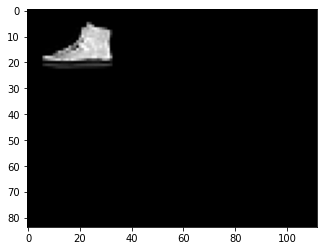

torch.Size([3, 84, 112])


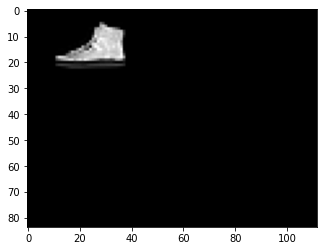

torch.Size([4, 84, 112])


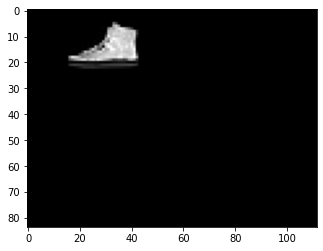

torch.Size([5, 84, 112])


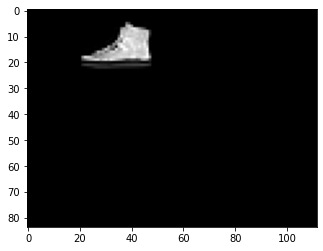

torch.Size([6, 84, 112])


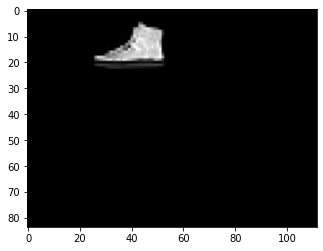

torch.Size([7, 84, 112])


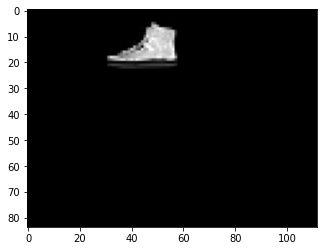

torch.Size([8, 84, 112])


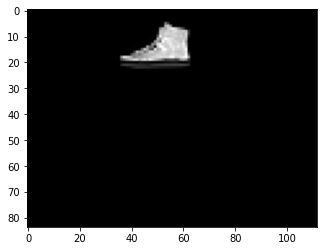

torch.Size([9, 84, 112])


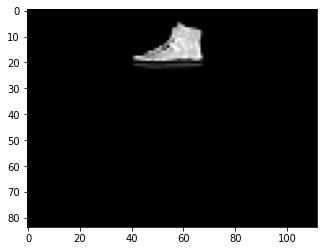

torch.Size([10, 84, 112])


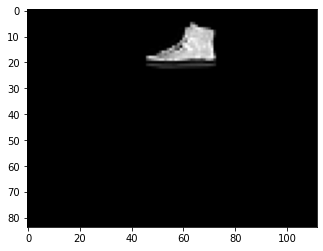

torch.Size([11, 84, 112])


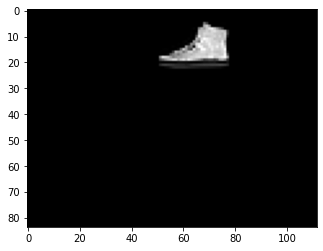

torch.Size([12, 84, 112])


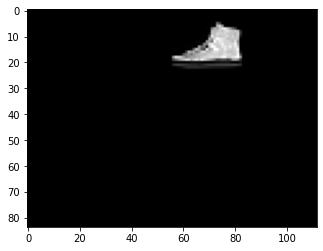

torch.Size([13, 84, 112])


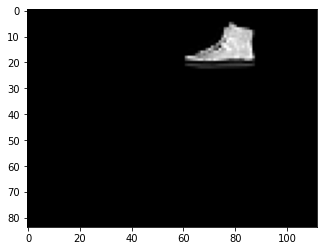

torch.Size([14, 84, 112])


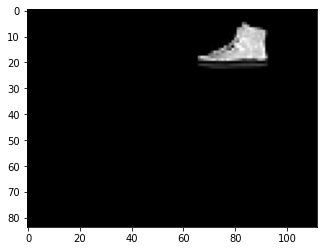

torch.Size([15, 84, 112])


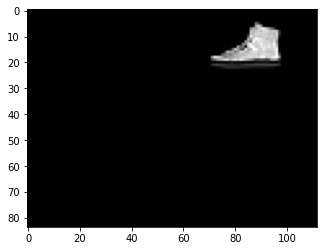

torch.Size([16, 84, 112])


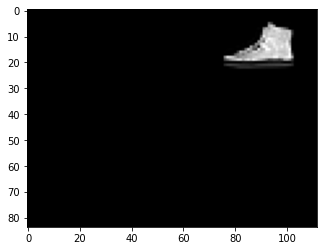

torch.Size([17, 84, 112])


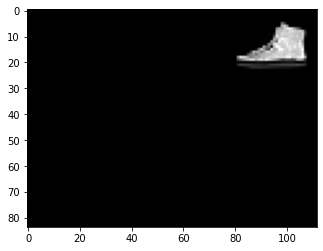

In [44]:
from math import floor
from torch import stack
from torch import cat
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from copy import deepcopy

# initialization
stride = 5
first_frame = deepcopy(aug_sample)
next_frame = deepcopy(aug_sample)
y = deepcopy(aug_sample)

# show info
print(y.size())
plt.imshow(y, cmap='gray')
pause(0.1)

for i in range(floor((112-28)/stride)):
   # moving part (1-dim only)
   for j in range(28):
      next_frame[:, 28+stride*(i+1)-(j+1)] = next_frame[:, 28+stride*i-(j+1)]
   next_frame[:, :stride*(i+1)+1] = 0  # clean other area
   
   # sequencing part
   if i == 0:
      y = stack((first_frame, next_frame)) 
   else:
      y = cat((y, next_frame.reshape(1, 28*3, 28*4)), dim=0)
      
   # show info
   print(y.size())
   plt.imshow(y[i+1], cmap='gray')
   pause(0.1)

### parellel random movement and re-concat for last frames

new start position [x, y] = [ 25 , 55 ]


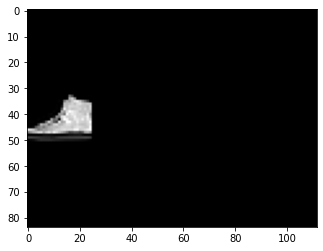

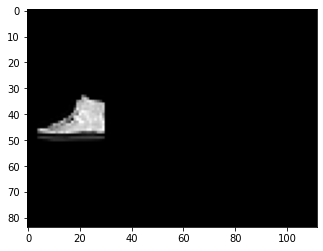

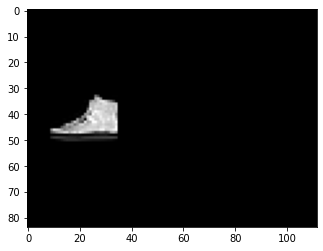

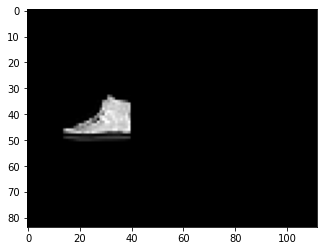

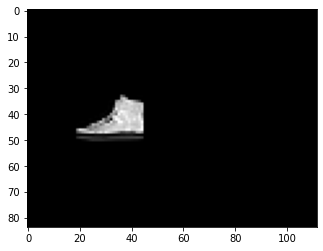

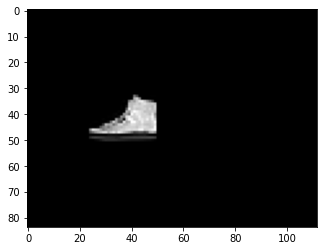

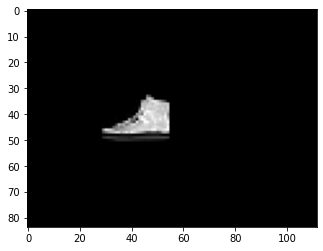

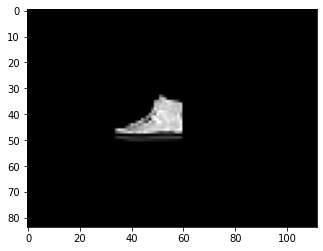

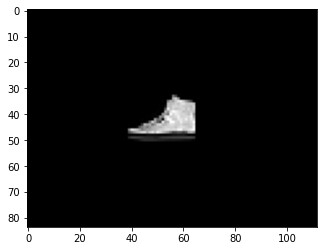

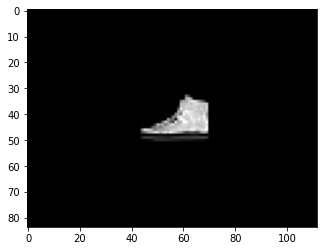

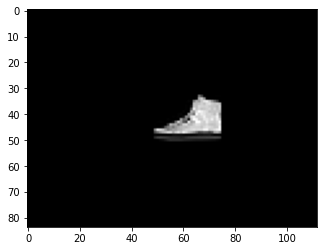

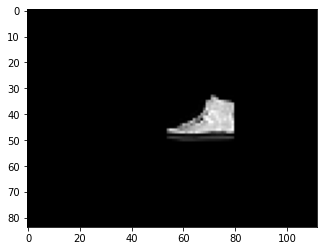

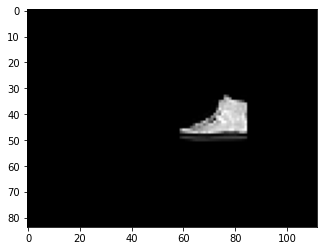

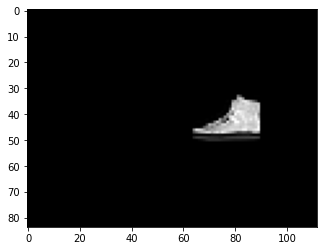

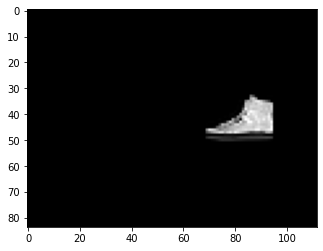

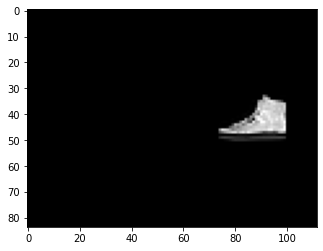

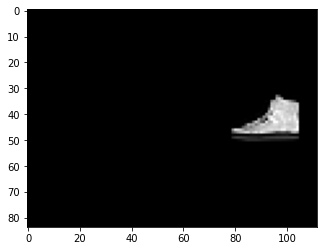

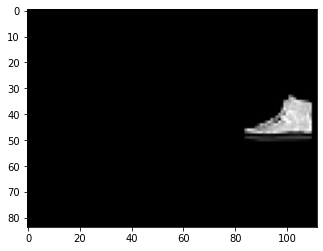

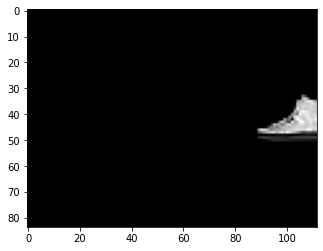

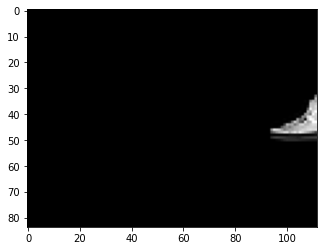

torch.Size([20, 84, 112])


In [47]:
from math import floor, ceil
from torch import cat
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from copy import deepcopy

y_moved = deepcopy(y)
rand_x = randint(14, 27)
rand_y = randint(27, 28*3-1)
print("new start position [x, y] = [", rand_x,",", rand_y, "]")

# all frames move left parellel
for i in range(floor((112-28)/stride)+1):
   for j in range(28):
      for k in range(28):
         y_moved[i][rand_y-j][rand_x+stride*i-k] = y_moved[i][27-j][27+stride*i-k]
   
   # clean other area
   y_moved[i][:rand_y-28+1, :] = 0
   y_moved[i][:, rand_x+stride*i:] = 0
   
   # show info
   plt.imshow(y_moved[i], cmap='gray')
   pause(0.1)

# initialization
frame_old = len(y_moved)   # number of old frames
next_frame = deepcopy(y_moved[len(y_moved)-1])

# last frame moves right and cat
for i in range(ceil((28-rand_x)/stride)*2+1):
   for j in range(28):
      if rand_x+stride*(frame_old+i)-j < 112:
         next_frame[:, rand_x+stride*(frame_old+i)-j] = next_frame[:, rand_x+stride*(frame_old+i-1)-j]
   next_frame[:, :rand_x+stride*(frame_old+i)-28+1] = 0  # clean other area
   y_moved = cat((y_moved, next_frame.reshape(1, 28*3, 28*4)), dim=0)
   
   # show info
   plt.imshow(y_moved[frame_old+i], cmap='gray')
   pause(0.1)

print(y_moved.size())

print a frame difference

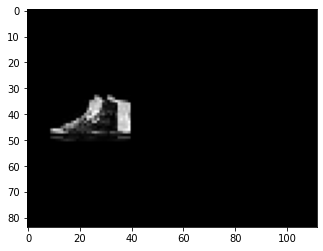

In [48]:
# show info
plt.imshow(abs(y_moved[3]-y_moved[2]), cmap='gray')

### sequential bounding box visualization and random position

In [24]:
from math import floor, ceil
from torch import cat
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from copy import deepcopy

sequential box preparation

torch.Size([84, 112])


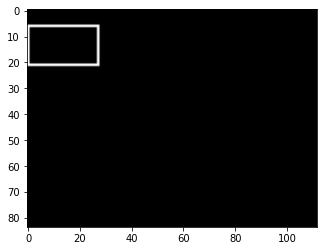

In [25]:
# initialization
stride = 5
first_frame = deepcopy(box_sample)
next_frame = deepcopy(box_sample)
y_box = deepcopy(box_sample)

# show info
print(y_box.size())
plt.imshow(y_box, cmap='gray')
pause(0.1)

for i in range(floor((112-28)/stride)):
   # moving part (1-dim only)
   for j in range(30):  # bigger range to cover bounding box
      next_frame[:, 30+stride*(i+1)-(j+1)] = next_frame[:, 30+stride*i-(j+1)]
   next_frame[:, :stride*(i+1)] = 0  # clean other area
   
   # sequencing part
   if i == 0:
      y_box = stack((first_frame, next_frame)) 
   else:
      y_box = cat((y_box, next_frame.reshape(1, 28*3, 28*4)), dim=0)
      
   # # show info
   # print(y_box.size())
   # plt.imshow(y_box[i+1], cmap='gray')
   # pause(0.1)

parallel moving and concat last frames

new start position [x, y] = [ 23 , 58 ]


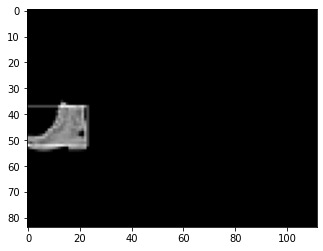

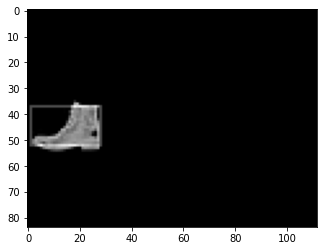

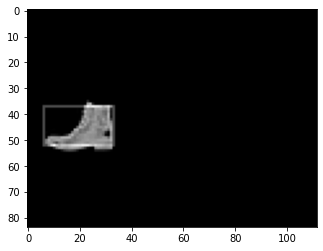

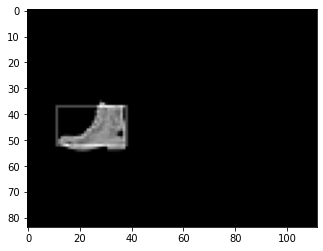

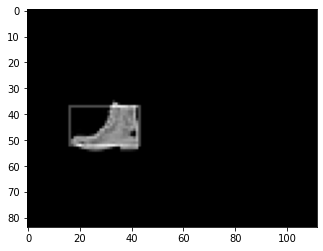

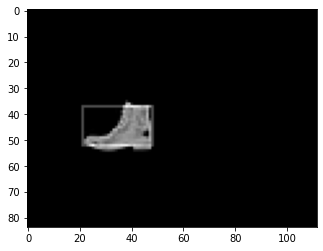

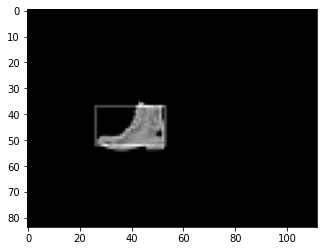

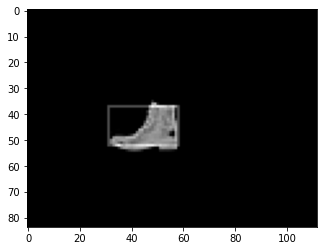

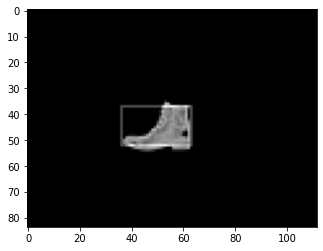

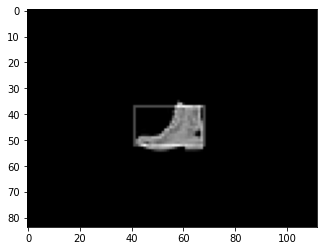

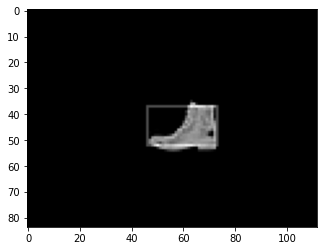

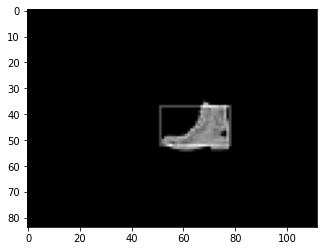

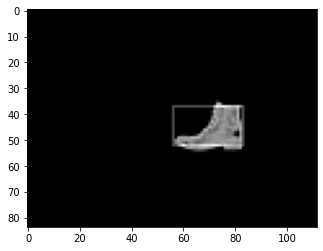

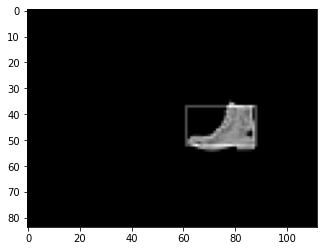

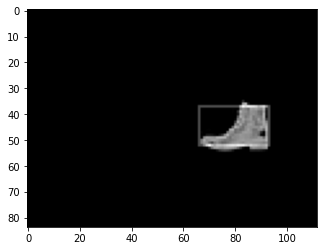

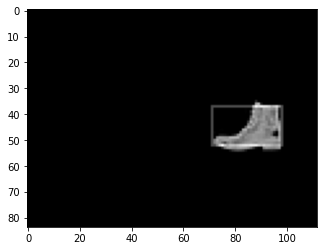

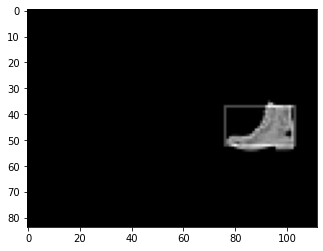

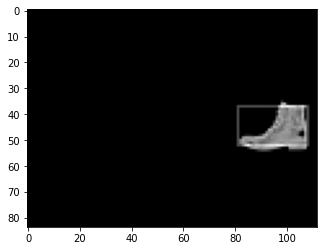

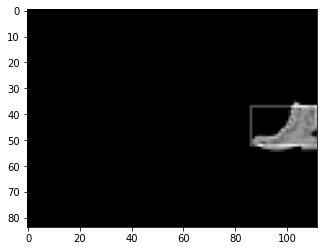

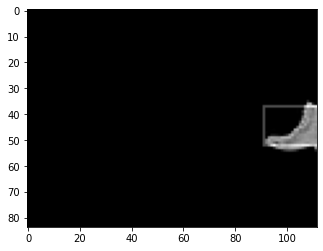

torch.Size([20, 84, 112])


In [26]:
# sequential data preparation
y_box_moved = deepcopy(y_box)
y_moved = deepcopy(y)
rand_x = randint(14, 27)
rand_y = randint(27, 28*3-1)
print("new start position [x, y] = [", rand_x,",", rand_y, "]")

# # visualization for no parallel movement
# for i in range(len(y_box_moved)):
#     plt.imshow(y_moved[i], cmap='gray')
#     plt.imshow(y_box_moved[i], cmap='gray', alpha=0.3)
#     pause(0.1)

# all frames move left parellel
for i in range(floor((112-28)/stride)+1): 
    # moving items
    for j in range(28):
        for k in range(28):
            y_moved[i][rand_y-j][rand_x+stride*i-k] = y_moved[i][27-j][27+stride*i-k]
    # moving box
    for j in range(29):
        for k in range(29):
            y_box_moved[i][rand_y-j+1][rand_x+stride*i-k+1] = y_box_moved[i][28-j][28+stride*i-k]
          
    # clean other area
    y_moved[i][:rand_y-28+1, :] = 0
    y_moved[i][:, rand_x+stride*i:] = 0
    y_box_moved[i][:rand_y-28+1, :] = 0
    y_box_moved[i][:, rand_x+stride*i+1:] = 0
   
    # show info
    plt.imshow(y_moved[i], cmap='gray')
    plt.imshow(y_box_moved[i], cmap='gray', alpha=0.3)
    pause(0.1)

# initialization
frame_old = len(y_moved)   # number of old frames
next_frame = deepcopy(y_moved[frame_old-1])
next_frame_box = deepcopy(y_box_moved[frame_old-1])

# last frame moves right and cat
for i in range(ceil((28-rand_x)/stride)*2+1):
    # move next frame
    for j in range(28):
        if rand_x+stride*(frame_old+i)-j < 112:
           next_frame[:, rand_x+stride*(frame_old+i)-j] = next_frame[:, rand_x+stride*(frame_old+i-1)-j]
    for j in range(29):
        if rand_x+stride*(frame_old+i)-j+1 < 112:
           next_frame_box[:, rand_x+stride*(frame_old+i)-j+1] = next_frame_box[:, rand_x+stride*(frame_old+i-1)-j+1]
    # clean and cat
    next_frame[:, :rand_x+stride*(frame_old+i)-28+1] = 0
    y_moved = cat((y_moved, next_frame.reshape(1, 28*3, 28*4)), dim=0)
    next_frame_box[:, :rand_x+stride*(frame_old+i)-28+1] = 0
    y_box_moved = cat((y_box_moved, next_frame_box.reshape(1, 28*3, 28*4)), dim=0)
   
    # show info
    plt.imshow(y_moved[frame_old+i], cmap='gray')
    plt.imshow(y_box_moved[frame_old+i], cmap='gray', alpha=0.3)
    pause(0.1)

print(y_moved.size())